# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from dqn_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [13]:
def train(check_pt_path,n_episodes=3000, eps_start=1.0, eps_end=0.01, eps_decay=0.997,isSolve=True,IsAvgScore=False):
    """Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    env=None
    env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    
    avgscores=[]
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state= env_info.vector_observations[0] 
        score = 0
        while True:
            action = int(agent.act(state, eps))
            env_info=env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]  
            agent.step(state, action, reward, next_state, done,eps)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            avgscores.append(np.mean(scores_window))
        if np.mean(scores_window)>=15.0 and isSolve:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(),check_pt_path)
            break
    env.close()
    if IsAvgScore:
        return avgscores
    else:
        return scores


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.47
Episode 200	Average Score: 2.68
Episode 300	Average Score: 4.83
Episode 400	Average Score: 6.78
Episode 500	Average Score: 9.67
Episode 600	Average Score: 12.15
Episode 700	Average Score: 12.64
Episode 800	Average Score: 14.00
Episode 900	Average Score: 13.63
Episode 1000	Average Score: 13.90
Episode 1100	Average Score: 14.57
Episode 1124	Average Score: 15.00
Environment solved in 1024 episodes!	Average Score: 15.00


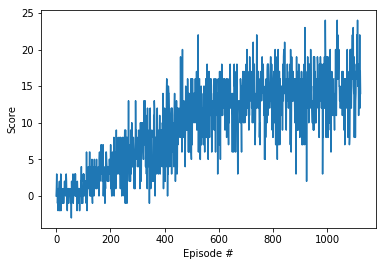

In [6]:
# train an agent with deep Q learing
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 64,GAMMA = 0.99,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4)

scores = train(check_pt_path='q_learning.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



Batch size :16


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.19
Episode 200	Average Score: 2.22
Episode 300	Average Score: 5.06
Episode 400	Average Score: 6.60
Episode 500	Average Score: 9.73
Episode 600	Average Score: 10.65
Episode 700	Average Score: 12.16
Episode 800	Average Score: 12.71
Episode 900	Average Score: 14.15
Episode 1000	Average Score: 14.07
Episode 1100	Average Score: 12.85
Episode 1200	Average Score: 14.83
Episode 1208	Average Score: 15.03
Environment solved in 1108 episodes!	Average Score: 15.03


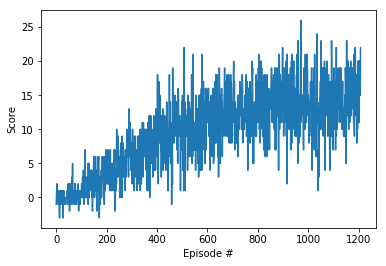

Batch size :32


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.52
Episode 200	Average Score: 2.12
Episode 300	Average Score: 4.93
Episode 400	Average Score: 7.12
Episode 500	Average Score: 9.56
Episode 600	Average Score: 11.00
Episode 700	Average Score: 12.64
Episode 800	Average Score: 13.89
Episode 900	Average Score: 14.28
Episode 1000	Average Score: 14.11
Episode 1058	Average Score: 15.03
Environment solved in 958 episodes!	Average Score: 15.03


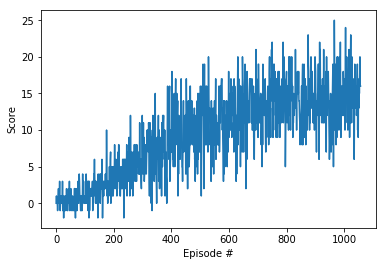

Batch size :64


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.47
Episode 200	Average Score: 2.68
Episode 300	Average Score: 4.83
Episode 400	Average Score: 6.78
Episode 500	Average Score: 9.67
Episode 600	Average Score: 12.15
Episode 700	Average Score: 12.64
Episode 800	Average Score: 13.99
Episode 900	Average Score: 13.69
Episode 1000	Average Score: 14.38
Episode 1100	Average Score: 14.32
Episode 1154	Average Score: 15.05
Environment solved in 1054 episodes!	Average Score: 15.05


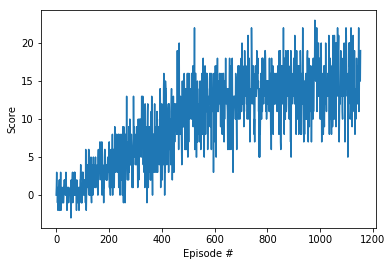

Batch size :128


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.42
Episode 200	Average Score: 2.63
Episode 300	Average Score: 4.49
Episode 400	Average Score: 7.74
Episode 500	Average Score: 10.09
Episode 600	Average Score: 11.11
Episode 700	Average Score: 12.66
Episode 800	Average Score: 13.92
Episode 900	Average Score: 13.52
Episode 1000	Average Score: 14.39
Episode 1100	Average Score: 14.10
Episode 1141	Average Score: 15.05
Environment solved in 1041 episodes!	Average Score: 15.05


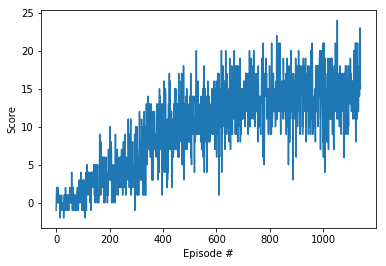

Batch size :256


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.24
Episode 200	Average Score: 2.13
Episode 300	Average Score: 4.15
Episode 400	Average Score: 7.73
Episode 500	Average Score: 10.02
Episode 600	Average Score: 10.95
Episode 700	Average Score: 11.76
Episode 800	Average Score: 10.82
Episode 900	Average Score: 12.39
Episode 1000	Average Score: 13.51
Episode 1100	Average Score: 13.95
Episode 1200	Average Score: 13.99
Episode 1294	Average Score: 15.02
Environment solved in 1194 episodes!	Average Score: 15.02


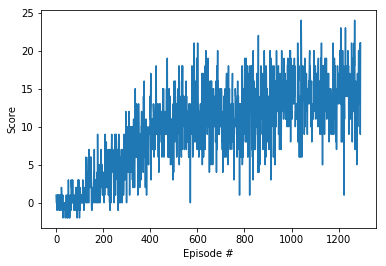

In [7]:
# explore batch size
BATCH_SIZEs=[16,32,64,128,256]
for b in BATCH_SIZEs:
    print('Batch size :' + str(b))
    agent = Agent(state_size=37, action_size=4, seed=32,BATCH_SIZE=b,GAMMA = 0.99,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4)

    scores = train(check_pt_path='q_learning.pth')

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()


GAMMAs :1


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.45
Episode 200	Average Score: 1.82
Episode 300	Average Score: 5.35
Episode 400	Average Score: 6.79
Episode 500	Average Score: 9.66
Episode 600	Average Score: 10.22
Episode 700	Average Score: 12.40
Episode 800	Average Score: 13.96
Episode 900	Average Score: 14.88
Episode 907	Average Score: 15.01
Environment solved in 807 episodes!	Average Score: 15.01


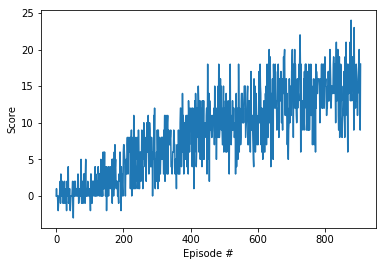

GAMMAs :0.99


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.52
Episode 200	Average Score: 2.12
Episode 300	Average Score: 4.93
Episode 400	Average Score: 7.12
Episode 500	Average Score: 9.56
Episode 600	Average Score: 11.00
Episode 700	Average Score: 12.64
Episode 800	Average Score: 13.89
Episode 900	Average Score: 14.28
Episode 1000	Average Score: 14.02
Episode 1100	Average Score: 14.66
Episode 1200	Average Score: 14.80
Episode 1212	Average Score: 15.04
Environment solved in 1112 episodes!	Average Score: 15.04


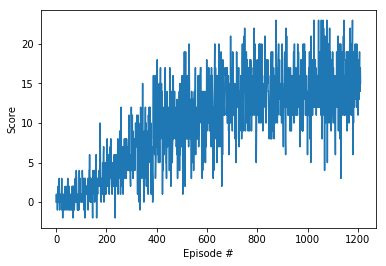

GAMMAs :0.95


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.54
Episode 200	Average Score: 2.61
Episode 300	Average Score: 4.74
Episode 400	Average Score: 6.56
Episode 500	Average Score: 9.34
Episode 600	Average Score: 11.85
Episode 700	Average Score: 12.50
Episode 800	Average Score: 13.89
Episode 900	Average Score: 13.98
Episode 980	Average Score: 15.06
Environment solved in 880 episodes!	Average Score: 15.06


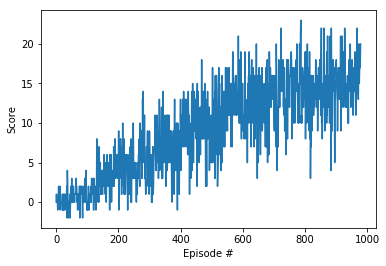

GAMMAs :0.9


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.21
Episode 200	Average Score: 1.20
Episode 300	Average Score: 3.72
Episode 400	Average Score: 5.91
Episode 500	Average Score: 8.45
Episode 600	Average Score: 10.41
Episode 700	Average Score: 11.43
Episode 800	Average Score: 12.65
Episode 900	Average Score: 13.49
Episode 1000	Average Score: 12.86
Episode 1100	Average Score: 13.87
Episode 1200	Average Score: 13.47
Episode 1300	Average Score: 13.35
Episode 1400	Average Score: 13.77
Episode 1500	Average Score: 14.15
Episode 1600	Average Score: 14.52
Episode 1667	Average Score: 15.01
Environment solved in 1567 episodes!	Average Score: 15.01


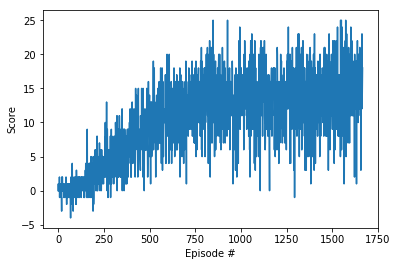

In [4]:
# explore GAMMA
GAMMAs=[1,0.99,0.95,0.9]
for b in GAMMAs:
    print('GAMMAs :' + str(b))
    agent = Agent(state_size=37, action_size=4, seed=32,BATCH_SIZE=32,GAMMA = b,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4)

    scores = train(check_pt_path='q_learning.pth')

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()



TAU size :0.01


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.47
Episode 200	Average Score: 2.58
Episode 300	Average Score: 3.45
Episode 400	Average Score: 4.12
Episode 500	Average Score: 2.97
Episode 600	Average Score: 4.68
Episode 700	Average Score: 5.17
Episode 800	Average Score: 6.20
Episode 900	Average Score: 6.34
Episode 1000	Average Score: 5.35
Episode 1100	Average Score: 5.36
Episode 1200	Average Score: 5.37
Episode 1300	Average Score: 5.64
Episode 1400	Average Score: 6.14
Episode 1500	Average Score: 6.11
Episode 1600	Average Score: 7.15
Episode 1700	Average Score: 7.33
Episode 1800	Average Score: 6.65
Episode 1900	Average Score: 6.63
Episode 2000	Average Score: 5.37
Episode 2100	Average Score: 7.04
Episode 2200	Average Score: 6.42
Episode 2300	Average Score: 5.33
Episode 2400	Average Score: 5.76
Episode 2500	Average Score: 7.02
Episode 2600	Average Score: 6.26
Episode 2700	Average Score: 5.79
Episode 2800	Average Score: 5.23
Episode 2900	Average Score: 5.63
Episode 3000	Average Score: 5.90


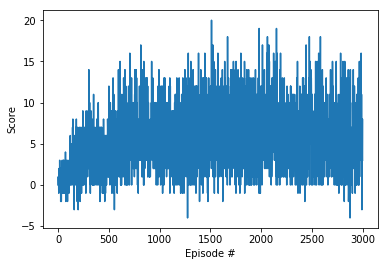

TAU size :0.001


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.45
Episode 200	Average Score: 1.82
Episode 300	Average Score: 5.35
Episode 400	Average Score: 6.79
Episode 500	Average Score: 9.66
Episode 600	Average Score: 10.22
Episode 700	Average Score: 12.40
Episode 800	Average Score: 13.96
Episode 900	Average Score: 14.88
Episode 907	Average Score: 15.01
Environment solved in 807 episodes!	Average Score: 15.01


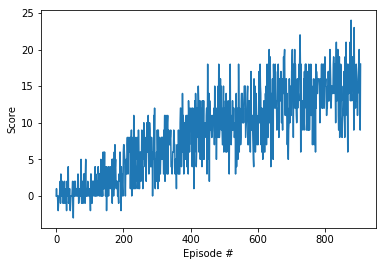

TAU size :0.0001


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.10
Episode 200	Average Score: 0.87
Episode 300	Average Score: 2.22
Episode 400	Average Score: 3.84
Episode 500	Average Score: 6.76
Episode 600	Average Score: 8.14
Episode 700	Average Score: 8.13
Episode 800	Average Score: 8.89
Episode 900	Average Score: 9.68
Episode 1000	Average Score: 8.48
Episode 1100	Average Score: 9.84
Episode 1200	Average Score: 9.832
Episode 1300	Average Score: 10.12
Episode 1400	Average Score: 10.47
Episode 1500	Average Score: 10.03
Episode 1600	Average Score: 10.76
Episode 1700	Average Score: 10.80
Episode 1800	Average Score: 12.05
Episode 1900	Average Score: 13.18
Episode 2000	Average Score: 13.29
Episode 2100	Average Score: 13.82
Episode 2200	Average Score: 13.21
Episode 2300	Average Score: 14.74
Episode 2400	Average Score: 14.18
Episode 2500	Average Score: 14.56
Episode 2539	Average Score: 15.00
Environment solved in 2439 episodes!	Average Score: 15.00


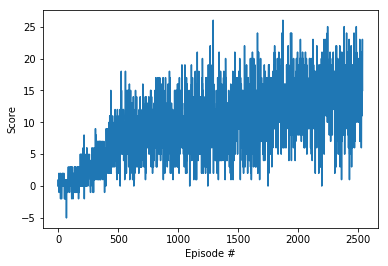

TAU size :1e-05


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: -0.04
Episode 200	Average Score: 0.271
Episode 300	Average Score: 0.73
Episode 400	Average Score: 1.09
Episode 500	Average Score: 1.05
Episode 600	Average Score: 1.34
Episode 700	Average Score: 2.16
Episode 800	Average Score: 2.31
Episode 900	Average Score: 1.88
Episode 1000	Average Score: 1.98
Episode 1100	Average Score: 1.74
Episode 1200	Average Score: 1.88
Episode 1300	Average Score: 2.14
Episode 1400	Average Score: 2.35
Episode 1500	Average Score: 2.47
Episode 1600	Average Score: 3.36
Episode 1700	Average Score: 4.66
Episode 1800	Average Score: 4.92
Episode 1900	Average Score: 4.89
Episode 2000	Average Score: 5.26
Episode 2100	Average Score: 5.01
Episode 2200	Average Score: 5.03
Episode 2300	Average Score: 5.10
Episode 2400	Average Score: 5.73
Episode 2500	Average Score: 5.88
Episode 2600	Average Score: 6.04
Episode 2700	Average Score: 6.04
Episode 2800	Average Score: 6.03
Episode 2900	Average Score: 6.01
Episode 3000	Average Score: 6.52


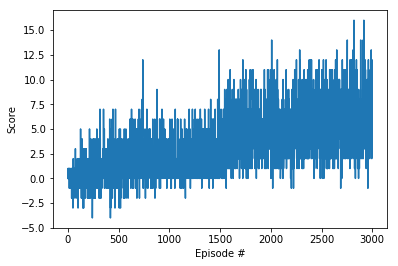

In [5]:
# explore TAU
TAUs=[1e-2,1e-3,1e-4,1e-5]
for b in TAUs:
    print('TAU size :' + str(b))
    agent = Agent(state_size=37, action_size=4, seed=32,BATCH_SIZE=32,GAMMA = 1,TAU = b,LR = 5e-4,UPDATE_EVERY = 4)

    scores = train(check_pt_path='q_learning.pth')

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()




LR :0.05


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.09
Episode 200	Average Score: 0.032
Episode 300	Average Score: -0.18
Episode 400	Average Score: -0.07
Episode 500	Average Score: -0.28
Episode 600	Average Score: -0.09
Episode 700	Average Score: 0.003
Episode 800	Average Score: -0.16
Episode 900	Average Score: -0.18
Episode 1000	Average Score: 0.17
Episode 1100	Average Score: 0.133
Episode 1200	Average Score: 0.031
Episode 1300	Average Score: -0.10
Episode 1400	Average Score: 0.072
Episode 1500	Average Score: 0.053
Episode 1600	Average Score: -0.04
Episode 1700	Average Score: -0.28
Episode 1800	Average Score: 0.061
Episode 1900	Average Score: 0.031
Episode 2000	Average Score: 0.081
Episode 2100	Average Score: -0.06
Episode 2200	Average Score: 0.041
Episode 2300	Average Score: 0.011
Episode 2400	Average Score: -0.10
Episode 2500	Average Score: 0.151
Episode 2600	Average Score: -0.10
Episode 2700	Average Score: -0.51
Episode 2800	Average Score: 0.037
Episode 2900	Average Score: -0.06
Episode 3000	Average Scor

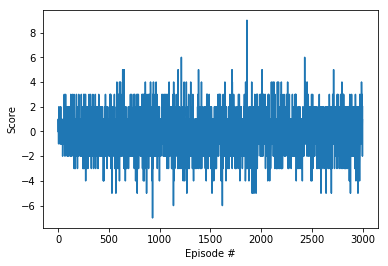

LR :0.005


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: -0.06
Episode 200	Average Score: 0.182
Episode 300	Average Score: 0.42
Episode 400	Average Score: -0.19
Episode 500	Average Score: 0.182
Episode 600	Average Score: -0.08
Episode 700	Average Score: 0.131
Episode 800	Average Score: 0.01
Episode 900	Average Score: -0.11
Episode 1000	Average Score: -0.08
Episode 1100	Average Score: 0.103
Episode 1200	Average Score: -0.04
Episode 1300	Average Score: -0.16
Episode 1400	Average Score: -0.25
Episode 1500	Average Score: -0.03
Episode 1600	Average Score: 0.021
Episode 1700	Average Score: 0.081
Episode 1800	Average Score: 0.003
Episode 1900	Average Score: 0.131
Episode 2000	Average Score: 0.052
Episode 2100	Average Score: -0.21
Episode 2200	Average Score: 0.122
Episode 2300	Average Score: -0.06
Episode 2400	Average Score: -0.22
Episode 2500	Average Score: 0.042
Episode 2600	Average Score: -0.17
Episode 2700	Average Score: -0.12
Episode 2800	Average Score: -0.15
Episode 2900	Average Score: 0.042
Episode 3000	Average Scor

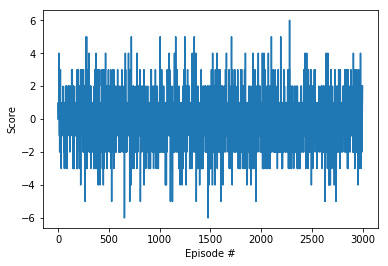

LR :0.0005


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.45
Episode 200	Average Score: 2.15
Episode 300	Average Score: 4.88
Episode 400	Average Score: 7.51
Episode 500	Average Score: 9.56
Episode 600	Average Score: 10.85
Episode 700	Average Score: 11.56
Episode 800	Average Score: 13.19
Episode 900	Average Score: 14.07
Episode 1000	Average Score: 14.74
Episode 1100	Average Score: 14.91
Episode 1105	Average Score: 15.01
Environment solved in 1005 episodes!	Average Score: 15.01


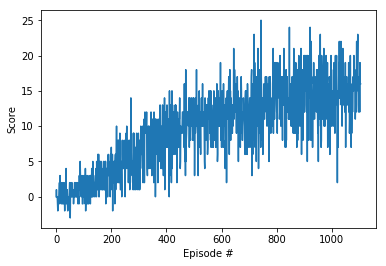

LR :5e-05


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.37
Episode 200	Average Score: 2.34
Episode 300	Average Score: 5.27
Episode 400	Average Score: 6.96
Episode 500	Average Score: 7.79
Episode 600	Average Score: 9.84
Episode 700	Average Score: 10.99
Episode 800	Average Score: 12.24
Episode 900	Average Score: 12.58
Episode 1000	Average Score: 12.79
Episode 1100	Average Score: 13.96
Episode 1200	Average Score: 13.91
Episode 1300	Average Score: 14.13
Episode 1400	Average Score: 14.91
Episode 1405	Average Score: 15.00
Environment solved in 1305 episodes!	Average Score: 15.00


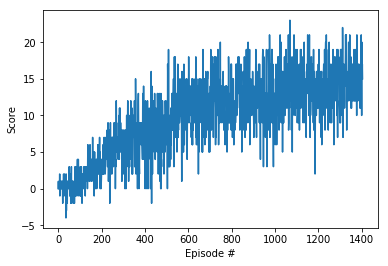

LR :5e-06


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.26
Episode 200	Average Score: -0.12
Episode 300	Average Score: 0.682
Episode 400	Average Score: 1.42
Episode 500	Average Score: 2.62
Episode 600	Average Score: 4.11
Episode 700	Average Score: 6.34
Episode 800	Average Score: 8.35
Episode 900	Average Score: 8.53
Episode 1000	Average Score: 9.14
Episode 1100	Average Score: 10.65
Episode 1200	Average Score: 10.65
Episode 1300	Average Score: 10.41
Episode 1400	Average Score: 10.45
Episode 1500	Average Score: 11.06
Episode 1600	Average Score: 11.44
Episode 1700	Average Score: 11.82
Episode 1800	Average Score: 11.85
Episode 1900	Average Score: 11.96
Episode 2000	Average Score: 11.71
Episode 2100	Average Score: 12.30
Episode 2200	Average Score: 12.11
Episode 2300	Average Score: 11.96
Episode 2400	Average Score: 11.25
Episode 2500	Average Score: 12.44
Episode 2600	Average Score: 12.16
Episode 2700	Average Score: 12.15
Episode 2800	Average Score: 11.98
Episode 2900	Average Score: 12.58
Episode 3000	Average Score: 12.

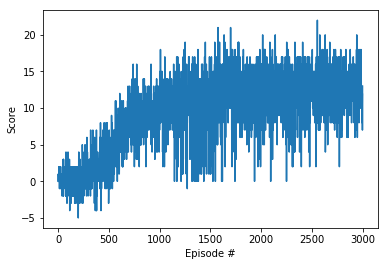

In [6]:
# explore LR
LRs=[5e-2,5e-3,5e-4,5e-5,5e-6]

for b in LRs:
    print('LR :' + str(b))
    agent = Agent(state_size=37, action_size=4, seed=32,BATCH_SIZE=32,GAMMA = 1,TAU = 1e-3,LR = b,UPDATE_EVERY = 4)

    scores = train(check_pt_path='q_learning.pth')

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

UPDATE_EVERY :2


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.34
Episode 200	Average Score: 3.14
Episode 300	Average Score: 5.15
Episode 400	Average Score: 7.80
Episode 500	Average Score: 9.09
Episode 600	Average Score: 10.14
Episode 700	Average Score: 11.67
Episode 800	Average Score: 11.48
Episode 900	Average Score: 12.19
Episode 1000	Average Score: 11.96
Episode 1100	Average Score: 11.56
Episode 1200	Average Score: 10.87
Episode 1300	Average Score: 12.27
Episode 1400	Average Score: 10.98
Episode 1500	Average Score: 11.20
Episode 1600	Average Score: 11.30
Episode 1700	Average Score: 10.96
Episode 1800	Average Score: 11.07
Episode 1900	Average Score: 11.30
Episode 2000	Average Score: 10.99
Episode 2100	Average Score: 9.990
Episode 2200	Average Score: 9.952
Episode 2300	Average Score: 10.34
Episode 2400	Average Score: 11.01
Episode 2500	Average Score: 9.463
Episode 2600	Average Score: 10.82
Episode 2700	Average Score: 10.43
Episode 2800	Average Score: 8.200
Episode 2900	Average Score: 8.00
Episode 3000	Average Score: 8

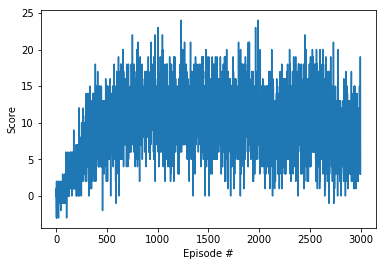

UPDATE_EVERY :4


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.45
Episode 200	Average Score: 1.82
Episode 300	Average Score: 5.35
Episode 400	Average Score: 6.79
Episode 500	Average Score: 9.66
Episode 600	Average Score: 10.22
Episode 700	Average Score: 12.40
Episode 800	Average Score: 13.96
Episode 900	Average Score: 14.88
Episode 907	Average Score: 15.01
Environment solved in 807 episodes!	Average Score: 15.01


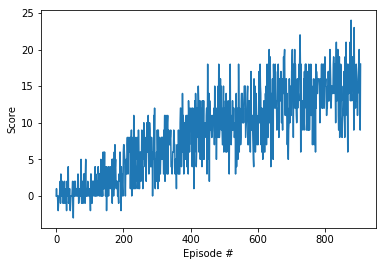

UPDATE_EVERY :6


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.40
Episode 200	Average Score: 2.66
Episode 300	Average Score: 3.94
Episode 400	Average Score: 6.69
Episode 500	Average Score: 8.59
Episode 600	Average Score: 11.19
Episode 700	Average Score: 12.97
Episode 800	Average Score: 14.20
Episode 900	Average Score: 14.24
Episode 1000	Average Score: 14.74
Episode 1100	Average Score: 14.20
Episode 1148	Average Score: 15.03
Environment solved in 1048 episodes!	Average Score: 15.03


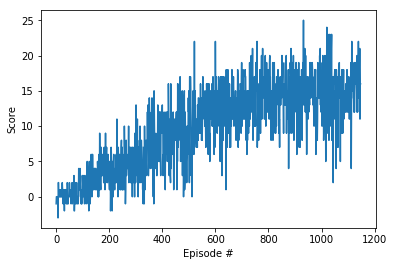

UPDATE_EVERY :8


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.30
Episode 200	Average Score: 2.18
Episode 300	Average Score: 4.75
Episode 400	Average Score: 6.33
Episode 500	Average Score: 7.81
Episode 600	Average Score: 9.92
Episode 700	Average Score: 12.28
Episode 800	Average Score: 14.00
Episode 900	Average Score: 14.00
Episode 1000	Average Score: 14.18
Episode 1100	Average Score: 14.47
Episode 1200	Average Score: 14.21
Episode 1221	Average Score: 15.02
Environment solved in 1121 episodes!	Average Score: 15.02


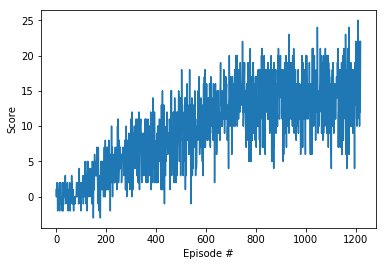

In [4]:
# explore UPDATE_EVERY
UPDATE_EVERYs=[2,4,6,8]

for b in UPDATE_EVERYs:
    print('UPDATE_EVERY :' + str(b))
    agent = Agent(state_size=37, action_size=4, seed=32,BATCH_SIZE=32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = b)

    scores = train(check_pt_path='q_learning.pth')

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.45
Episode 200	Average Score: 2.35
Episode 300	Average Score: 4.82
Episode 400	Average Score: 6.97
Episode 500	Average Score: 9.54
Episode 600	Average Score: 11.59
Episode 700	Average Score: 12.82
Episode 800	Average Score: 13.07
Episode 900	Average Score: 12.70
Episode 1000	Average Score: 12.92
Episode 1100	Average Score: 13.46
Episode 1200	Average Score: 14.76
Episode 1245	Average Score: 15.05
Environment solved in 1145 episodes!	Average Score: 15.05


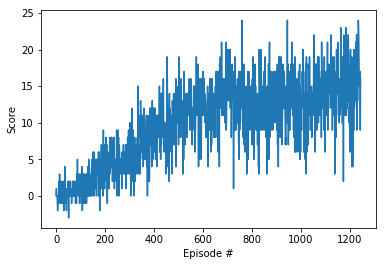

In [14]:
# train an agent with deep Q learing in optimized hyperparameters
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=False,isDuel=False)

scores = train(check_pt_path='q_learning.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.40
Episode 200	Average Score: 2.09
Episode 300	Average Score: 4.47
Episode 400	Average Score: 6.94
Episode 500	Average Score: 8.97
Episode 600	Average Score: 11.03
Episode 700	Average Score: 13.32
Episode 800	Average Score: 13.20
Episode 900	Average Score: 13.86
Episode 964	Average Score: 15.00
Environment solved in 864 episodes!	Average Score: 15.00


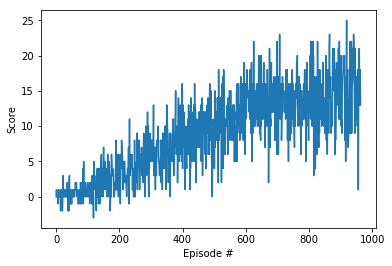

In [15]:
# train an agent with deep Double Q learing
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=True,isDuel=False)

scores = train(check_pt_path='double_q_learning.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.50
Episode 200	Average Score: 1.85
Episode 300	Average Score: 4.51
Episode 400	Average Score: 6.42
Episode 500	Average Score: 9.53
Episode 600	Average Score: 10.55
Episode 700	Average Score: 12.49
Episode 800	Average Score: 12.87
Episode 900	Average Score: 13.77
Episode 1000	Average Score: 13.75
Episode 1100	Average Score: 14.55
Episode 1164	Average Score: 15.04
Environment solved in 1064 episodes!	Average Score: 15.04


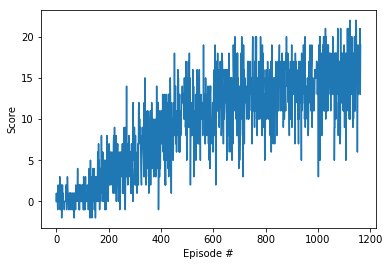

In [16]:
# train an agent with deep Q learing in Deul Network structure
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=False,isDuel=True)

scores = train(check_pt_path='duel_q_learning.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.30
Episode 200	Average Score: 1.64
Episode 300	Average Score: 4.23
Episode 400	Average Score: 7.50
Episode 500	Average Score: 8.70
Episode 600	Average Score: 11.58
Episode 700	Average Score: 13.03
Episode 800	Average Score: 13.51
Episode 900	Average Score: 14.02
Episode 1000	Average Score: 13.31
Episode 1100	Average Score: 14.51
Episode 1200	Average Score: 14.15
Episode 1247	Average Score: 15.05
Environment solved in 1147 episodes!	Average Score: 15.05


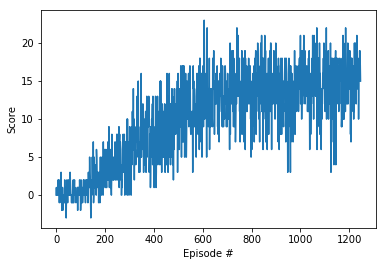

In [17]:
# train an agent with deep Double Q learing in Deul Network structure
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=True,isDuel=True)

scores = train(check_pt_path='duel_double_q_learning.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



In [18]:
# train an agent with deep Q learing in optimized hyperparameters for 3000 steps
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=False,isDuel=False)

scores_q = train(check_pt_path='q_learning.pth',isSolve=False,IsAvgScore=True)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.45
Episode 200	Average Score: 1.82
Episode 300	Average Score: 5.35
Episode 400	Average Score: 6.79
Episode 500	Average Score: 9.66
Episode 600	Average Score: 10.22
Episode 700	Average Score: 12.40
Episode 800	Average Score: 13.47
Episode 900	Average Score: 14.49
Episode 1000	Average Score: 14.24
Episode 1100	Average Score: 14.86
Episode 1200	Average Score: 14.05
Episode 1300	Average Score: 14.50
Episode 1400	Average Score: 14.26
Episode 1500	Average Score: 14.58
Episode 1600	Average Score: 14.31
Episode 1700	Average Score: 15.26
Episode 1800	Average Score: 14.22
Episode 1900	Average Score: 14.40
Episode 2000	Average Score: 13.68
Episode 2100	Average Score: 14.51
Episode 2200	Average Score: 14.05
Episode 2300	Average Score: 12.71
Episode 2400	Average Score: 13.46
Episode 2500	Average Score: 13.26
Episode 2600	Average Score: 13.00
Episode 2700	Average Score: 12.93
Episode 2800	Average Score: 13.58
Episode 2900	Average Score: 13.10
Episode 3000	Average Score: 

In [19]:
# train an agent with deep double Q learing in optimized hyperparameters for 3000 steps
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=True,isDuel=False)

scores_double_q = train(check_pt_path='double_q_learning.pth',isSolve=False,IsAvgScore=True)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.40
Episode 200	Average Score: 2.09
Episode 300	Average Score: 4.47
Episode 400	Average Score: 6.94
Episode 500	Average Score: 8.85
Episode 600	Average Score: 12.07
Episode 700	Average Score: 12.99
Episode 800	Average Score: 13.22
Episode 900	Average Score: 13.29
Episode 1000	Average Score: 14.23
Episode 1100	Average Score: 14.78
Episode 1200	Average Score: 15.26
Episode 1300	Average Score: 16.21
Episode 1400	Average Score: 15.44
Episode 1500	Average Score: 15.44
Episode 1600	Average Score: 14.75
Episode 1700	Average Score: 15.06
Episode 1800	Average Score: 13.72
Episode 1900	Average Score: 14.71
Episode 2000	Average Score: 15.27
Episode 2100	Average Score: 14.54
Episode 2200	Average Score: 14.91
Episode 2300	Average Score: 13.68
Episode 2400	Average Score: 14.49
Episode 2500	Average Score: 14.54
Episode 2600	Average Score: 13.68
Episode 2700	Average Score: 14.97
Episode 2800	Average Score: 15.27
Episode 2900	Average Score: 14.88
Episode 3000	Average Score: 

In [21]:
# train an agent with deep Q learing with deuling network in optimized hyperparameters for 3000 steps
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=False,isDuel=True)

scores_duel_q = train(check_pt_path='duel_q_learning.pth',isSolve=False,IsAvgScore=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.50
Episode 200	Average Score: 1.85
Episode 300	Average Score: 4.77
Episode 400	Average Score: 6.72
Episode 500	Average Score: 8.82
Episode 600	Average Score: 11.00
Episode 700	Average Score: 12.93
Episode 800	Average Score: 13.84
Episode 900	Average Score: 13.75
Episode 1000	Average Score: 13.95
Episode 1100	Average Score: 14.02
Episode 1200	Average Score: 13.74
Episode 1300	Average Score: 13.66
Episode 1400	Average Score: 14.48
Episode 1500	Average Score: 16.21
Episode 1600	Average Score: 15.12
Episode 1700	Average Score: 16.07
Episode 1800	Average Score: 15.45
Episode 1900	Average Score: 14.31
Episode 2000	Average Score: 13.88
Episode 2100	Average Score: 13.51
Episode 2200	Average Score: 13.72
Episode 2300	Average Score: 14.38
Episode 2400	Average Score: 13.61
Episode 2500	Average Score: 14.87
Episode 2600	Average Score: 15.22
Episode 2700	Average Score: 14.02
Episode 2800	Average Score: 13.36
Episode 2900	Average Score: 14.36
Episode 3000	Average Score: 

In [22]:
# train an agent with deep double Q learing with deuling network in optimized hyperparameters for 3000 steps
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=True,isDuel=True)

scores_duel_double_ddq = train(check_pt_path='duel_double_q_learning.pth',isSolve=False,IsAvgScore=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.34
Episode 200	Average Score: 1.85
Episode 300	Average Score: 4.66
Episode 400	Average Score: 6.52
Episode 500	Average Score: 9.40
Episode 600	Average Score: 11.69
Episode 700	Average Score: 12.22
Episode 800	Average Score: 12.96
Episode 900	Average Score: 13.71
Episode 1000	Average Score: 13.27
Episode 1100	Average Score: 14.63
Episode 1200	Average Score: 15.25
Episode 1300	Average Score: 15.05
Episode 1400	Average Score: 14.96
Episode 1500	Average Score: 13.63
Episode 1600	Average Score: 14.39
Episode 1700	Average Score: 15.28
Episode 1800	Average Score: 13.92
Episode 1900	Average Score: 13.98
Episode 2000	Average Score: 14.45
Episode 2100	Average Score: 14.33
Episode 2200	Average Score: 14.45
Episode 2300	Average Score: 13.38
Episode 2400	Average Score: 12.23
Episode 2500	Average Score: 13.95
Episode 2600	Average Score: 13.59
Episode 2700	Average Score: 14.85
Episode 2800	Average Score: 14.62
Episode 2900	Average Score: 14.90
Episode 3000	Average Score: 

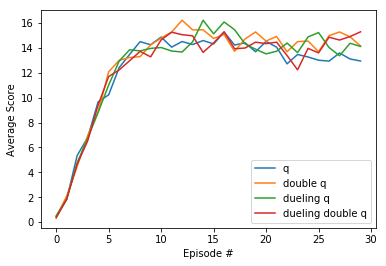

In [24]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_q)), scores_q)
plt.plot(np.arange(len(scores_double_q)), scores_double_q)
plt.plot(np.arange(len(scores_duel_q)), scores_duel_q)
plt.plot(np.arange(len(scores_duel_double_ddq)), scores_duel_double_ddq)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.legend(['q', 'double q', 'dueling q', 'dueling double q'], loc='lower right')
plt.show()

In [3]:
#Watch a dqn trained Agent
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=False,isDuel=False)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('q_learning.pth'))

env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = int(agent.act(state,IsTest=True))                      # esp=0 by default whihc means it always select the max value action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 3.0


In [2]:
#Watch a double dqn trained Agent
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=True,isDuel=False)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('double_q_learning.pth'))

env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = int(agent.act(state,IsTest=True))                      # esp=0 by default whihc means it always select the max value action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 19.0


In [3]:
#Watch a dueling dqn trained Agent
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=False,isDuel=True)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('duel_q_learning.pth'))

env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = int(agent.act(state,IsTest=True))                      # esp=0 by default whihc means it always select the max value action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 17.0


In [4]:
#Watch a dueling dqn trained Agent
agent = Agent(state_size=37, action_size=4, seed=32,BUFFER_SIZE = int(1e5),BATCH_SIZE = 32,GAMMA = 1,TAU = 1e-3,LR = 5e-4,UPDATE_EVERY = 4,isDDQ=True,isDuel=True)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('duel_double_q_learning.pth'))

env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = int(agent.act(state,IsTest=True))                      # esp=0 by default whihc means it always select the max value action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 14.0


In [10]:
from collections import deque

a=deque(maxlen=5)
a.append(1)
a.append(2)
a.append(3)
a.append(4)
a.append(5)
print(sum(a))
for i in range(len(a)):
    a[i]=a[i]*3
print(a)
a.append(6)
for i in range(len(a)):
    a[i]=a[i]*3

print(a)
a.pop()
print(a)

15
deque([3, 6, 9, 12, 15], maxlen=5)
deque([18, 27, 36, 45, 18], maxlen=5)
deque([18, 27, 36, 45], maxlen=5)
